In [1]:
import tensorflow as tf
import numpy as np

In [2]:
tf.enable_eager_execution()

# Automatic differentiation

In [3]:
dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3, 4, 5, 6])
dataset = dataset.map(tf.square).shuffle(2).batch(2)

In [4]:
for x in dataset:
    print(x.numpy())

[4 1]
[ 9 16]
[25 36]


In [22]:
x = tf.constant(3.0)
with tf.GradientTape(persistent=True) as t:
    t.watch(x)
    y = x * x
    z = y * y

In [23]:
dz_dx = t.gradient(z, x)  # 108.0 (4*x^3 at x = 3)
print(dz_dx)
dy_dx = t.gradient(y, x)  # 6.0
print(dy_dx)
del t  # Drop the reference to the tape

tf.Tensor(108.0, shape=(), dtype=float32)
tf.Tensor(6.0, shape=(), dtype=float32)


# Training basics

In [30]:
class Model:
    def __init__(self):
        self.W = tf.contrib.eager.Variable(5.0)
        self.b = tf.contrib.eager.Variable(0.0)
    
    def __call__(self, x):
        return self.W * x + self.b

In [31]:
model = Model()

In [32]:
model(10)

<tf.Tensor: id=126, shape=(), dtype=float32, numpy=50.0>

In [33]:
def loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

In [37]:
TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

inputs  = tf.random_normal(shape=[NUM_EXAMPLES])
noise   = tf.random_normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise

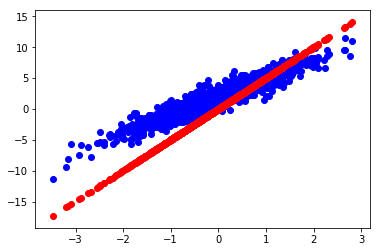

Current loss: 
10.017843


In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

print('Current loss: '),
print(loss(outputs, model(inputs)).numpy())

In [41]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
        current_loss = loss(outputs, model(inputs))
    dW, db = t.gradient(current_loss, [model.W, model.b])
    model.W.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

Epoch  0: W=5.00 b=0.00, loss=10.01784
Epoch  1: W=4.55 b=0.43, loss=6.57278
Epoch  2: W=4.20 b=0.76, loss=4.45403
Epoch  3: W=3.92 b=1.03, loss=3.15087
Epoch  4: W=3.70 b=1.24, loss=2.34928
Epoch  5: W=3.54 b=1.40, loss=1.85616
Epoch  6: W=3.41 b=1.53, loss=1.55278
Epoch  7: W=3.30 b=1.63, loss=1.36611
Epoch  8: W=3.22 b=1.71, loss=1.25123
Epoch  9: W=3.16 b=1.78, loss=1.18053


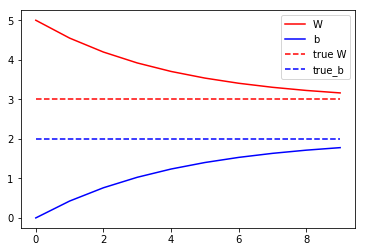

In [42]:
model = Model()

# Collect the history of W-values and b-values to plot later
Ws, bs = [], []
epochs = range(10)
for epoch in epochs:
  Ws.append(model.W.numpy())
  bs.append(model.b.numpy())
  current_loss = loss(model(inputs), outputs)

  train(model, inputs, outputs, learning_rate=0.1)
  print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, Ws[-1], bs[-1], current_loss))

# Let's plot it all
plt.plot(epochs, Ws, 'r',
         epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
         [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'true W', 'true_b'])
plt.show()

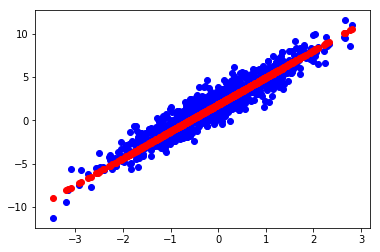

Current loss: 
1.1370174


In [43]:
plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

print('Current loss: '),
print(loss(outputs, model(inputs)).numpy())